In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.HANG_TIME)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-19 17:04:14,429 - whar-datasets - INFO - Running DownloadingStep
2026-02-19 17:04:14,430 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-19 17:04:14,431 - whar-datasets - INFO - Hash is up to date
2026-02-19 17:04:14,431 - whar-datasets - INFO - Running ParsingStep
2026-02-19 17:04:14,431 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-19 17:04:14,432 - whar-datasets - INFO - Hash is up to date
2026-02-19 17:04:14,432 - whar-datasets - INFO - Running WindowingStep
2026-02-19 17:04:14,433 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-19 17:04:14,433 - whar-datasets - INFO - Hash is not up to date
2026-02-19 17:04:14,438 - whar-datasets - INFO - Validating common format
2026-02-19 17:04:14,446 - whar-datasets - INFO - Validating sessions (parallelized)


[########################################] | 100% Completed | 8.06 sms


2026-02-19 17:04:22,802 - whar-datasets - INFO - Common format validated.
2026-02-19 17:04:22,802 - whar-datasets - INFO - Compute windowing
2026-02-19 17:04:22,803 - whar-datasets - INFO - Selecting activities
2026-02-19 17:04:22,810 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 61.87 ss


2026-02-19 17:05:25,258 - whar-datasets - INFO - Saving windowing
2026-02-19 17:05:43,643 - whar-datasets - INFO - Loading windowing
2026-02-19 17:05:43,676 - whar-datasets - INFO - activity_ids from 0 to 5
2026-02-19 17:05:43,676 - whar-datasets - INFO - subject_ids from 0 to 23


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 72392 18097 4418
subject_1 72850 18212 3845
subject_2 73220 18305 3382
subject_3 72281 18070 4556
subject_4 73132 18282 3493
subject_5 72502 18125 4280
subject_6 73063 18265 3579
subject_7 72148 18036 4723
subject_8 72252 18062 4593
subject_9 73294 18323 3290
subject_10 72279 18069 4559
subject_11 73270 18317 3320
subject_12 72368 18091 4448
subject_13 73179 18294 3434
subject_14 72388 18097 4422
subject_15 73287 18321 3299
subject_16 72224 18055 4628
subject_17 73118 18279 3510
subject_18 73309 18327 3271
subject_19 72485 18121 4301
subject_20 73300 18325 3282
subject_21 72317 18079 4511
subject_22 72404 18100 4403
subject_23 73238 18309 3360


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(False)

2026-02-19 17:05:43,974 - whar-datasets - INFO - Running SamplingStep
2026-02-19 17:05:43,975 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-19 17:05:43,977 - whar-datasets - INFO - Hash is not up to date
2026-02-19 17:05:56,540 - whar-datasets - INFO - Computing samples
2026-02-19 17:05:56,541 - whar-datasets - INFO - Getting normalization parameters
2026-02-19 17:05:58,302 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 37.84 s


2026-02-19 17:06:36,542 - whar-datasets - INFO - Saving samples
2026-02-19 17:06:37,425 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

94907


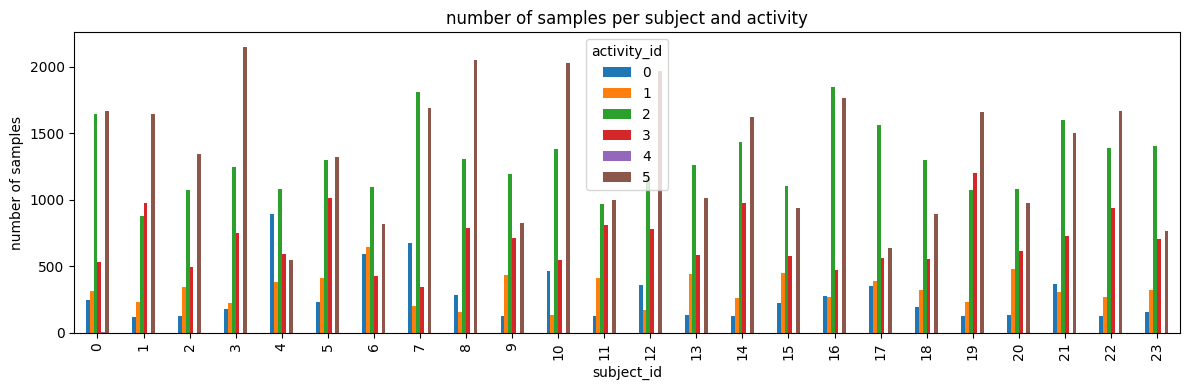

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 5, Subject: 12')

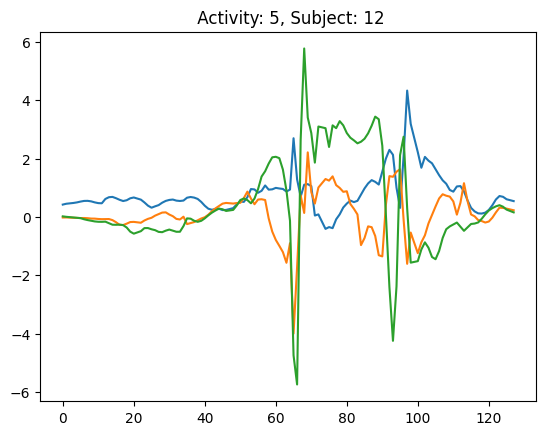

In [22]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")